# Introduction and Motivation

This project is part of the final assignment for Classical Data Analysis lecturer by Miguel Sainz at Barcelona Technology School.

As a Data Specialist, the project aims to generate analysis to the technical office of Austin, Texas council. Also, the dataset offers the Austin 311 Complaints Calls, a service which provides solutions in the city.

Since I have spent part of my life living in Austin, TX for studying English and working! This city brings me such as good memories, so I would like to analyze the most requests and issues that people is concerned, and why not? Feel me identify!

During this notebook, we clean up the dataset, provide several plots to understand the data, and applied traditional algorithms for classifying our target variable, called *status*.

Let's enjoy together!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import os
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


In [3]:

'''Getting the path and the destination for unzipping:'''
zip_file_path = 'austin_311_service_requests.zip'

# Ensure the zip file exists
if os.path.exists(zip_file_path):
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the current directory
        zip_ref.extractall('.')
else:
    print(f"File {zip_file_path} not found.")


In [4]:

'''
Now, after having extracted and named the file as austin_311_service_requests.csv,
let's define the path to the CSV file
'''
# csv_file_path = '/content/drive/MyDrive/FinalProject/austin_311_service_requests.csv'
csv_file_path = 'austin_311_service_requests.csv'

'''Load the CSV file into a pandas DataFrame'''
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print('Data loaded successfully!')
else:
    print(f'File {csv_file_path} not found.')

df.head(3)


Data loaded successfully!


/var/folders/_m/x_6kdcg111940vvx5zz0_c7r0000gn/T/ipykernel_9124/474937941.py:10: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,map_tile,owning_department,source,state_plane_x_coordinate,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key
0,AUSTIN,2015-01-20 10:41:48,Loose Dog,ACLONAG,3.0,TRAVIS,2015-01-20 10:41:48,1305 CORIANDER DR AUSTIN TX,78741.0,2015-01-27 12:51:06,...,ML18,Animal Services Office,Phone,3131141.687108,1.005532e+07,Duplicate (closed),2015-01-20 10:41:48,CORIANDER,1305.0,15-00012439
1,AUSTIN,2016-06-01 10:58:13,Loose Dog,ACLONAG,7.0,TRAVIS,2016-05-22 10:00:49,3104 STONEWAY DR AUSTIN TX 78757,78757.0,2016-06-01 09:58:30,...,MJ29,Animal Services Office,Phone,3112134.249305,1.010083e+07,Closed,2016-06-01 10:58:13,STONEWAY,3104.0,16-00123310
2,AUSTIN,2014-01-06 19:30:00,Loose Animal (not dog),ACLOANIM,2.0,TRAVIS,2014-01-06 18:04:00,4100 SMITH SCHOOL RD AUSTIN TX,78744.0,2014-01-06 18:32:00,...,MK16,Animal Services Office,Phone,3124825.402488,1.004597e+07,Closed,2014-01-06 19:30:00,SMITH SCHOOL,4100.0,14-00003554


In [5]:
df.tail(3)

,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,map_tile,owning_department,source,state_plane_x_coordinate,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key
463537,AUSTIN,2016-07-05 18:37:04,Animal - Proper Care,ACPROPER,6.0,TRAVIS,2016-07-04 16:33:51,5925 GREEN ACRES AUSTIN TX 78727,78727.0,2016-07-05 17:35:05,...,MJ37,Animal Services Office,Phone,3112573.248123,1.013289e+07,Closed,2016-07-05 18:37:04,GREEN ACRES,5925.0,16-00167047
463538,AUSTIN,2016-12-15 19:34:21,ARR Missed Recycling,SWSRECYC,6.0,TRAVIS,2016-12-08 08:09:24,8800 SPRING LAKE DR AUSTIN TX 78750,78750.0,2016-12-15 19:34:21,...,MG36,Austin Resource Recovery,Phone,3097904.75,1.013103e+07,Closed,2016-12-15 19:34:21,SPRING LAKE,8800.0,16-00318639
463539,AUSTIN,2015-04-21 16:04:03,Aquatics Hotline Inquiry,AQUHOTIN,9.0,TRAVIS,2015-01-09 12:33:32,1904 NEWNING AVE AUSTIN TX,78704.0,2015-04-21 16:04:04,...,MJ20,Parks & Recreation Department,Phone,3112995.847603,1.006201e+07,Closed,2015-04-21 16:04:03,NEWNING,1904.0,15-00005599


In [6]:
df.shape

(463540, 24)

## Clean the Dataset

Before starting the EDA, let's manipulate, convert, and clean the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463540 entries, 0 to 463539
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      454982 non-null  object 
 1   close_date                428329 non-null  object 
 2   complaint_description     459305 non-null  object 
 3   complaint_type            459305 non-null  object 
 4   council_district_code     433338 non-null  float64
 5   county                    452747 non-null  object 
 6   created_date              452741 non-null  object 
 7   incident_address          455615 non-null  object 
 8   incident_zip              454963 non-null  float64
 9   last_update_date          452741 non-null  object 
 10  latitude                  455541 non-null  float64
 11  location                  455541 non-null  object 
 12  longitude                 455541 non-null  float64
 13  map_page                  454933 non-null  o

In [8]:
'''Converting the date variable from objects to dateType'''
df['created_date'] = pd.to_datetime(df['created_date'])
df['close_date'] = pd.to_datetime(df['close_date'])
df['last_update_date'] = pd.to_datetime(df['last_update_date'])
df['status_change_date'] = pd.to_datetime(df['status_change_date'])

In [9]:
'''
Here, we substract the difference from created_date and close_date to map the gap between the moment 
when a request is created againts when is solved (closed).
'''
def calculate_diff(row):
    if pd.notnull(row['close_date']):
        diff = row.close_date - row.created_date
    else:
        diff = row.last_update_date - row.created_date
    return diff.total_seconds() / 3600 / 24

'''Apply the function to each row in the DataFrame'''
df['diff_days'] = df.apply(calculate_diff, axis=1)

'''Display the DataFrame with the new column'''
df[['close_date', 'created_date', 'last_update_date', 'status_change_date', 'diff_days']].head(2)

,close_date,created_date,last_update_date,status_change_date,diff_days
0,2015-01-20 10:41:48,2015-01-20 10:41:48,2015-01-27 12:51:06,2015-01-20 10:41:48,0.000000
1,2016-06-01 10:58:13,2016-05-22 10:00:49,2016-06-01 09:58:30,2016-06-01 10:58:13,10.039861


In [10]:
'''Deleting the cases when the created_date is greater than the close_date'''
delete = df[df['diff_days'] < 0]
delete

,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,owning_department,source,state_plane_x_coordinate,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key,diff_days
279790,AUSTIN,NaT,Flooding - Past,DRFLOODR,5.0,TRAVIS,2014-06-04 10:03:42,5026 LANSING DR AUSTIN TX,78745.0,2014-06-04 09:10:25,...,Watershed Protection,Mass Entry,3100059.51014,1.005254e+07,Open,2014-06-04 10:03:42,LANSING,5026.0,14-00107853,-0.037002
293120,AUSTIN,2015-07-10,Loose Dog,ACLONAG,5.0,TRAVIS,2015-07-10 10:11:33,907 W SLAUGHTER LN AUSTIN TX,78748.0,2015-07-10 11:49:09,...,Animal Services Office,Phone,3094616.239,1.003604e+07,Closed,2015-07-10 12:46:02,SLAUGHTER,907.0,15-00158927,-0.424688


In [11]:
df = df.drop(delete.index)
df.shape

(463538, 25)

In [12]:
'''Getting the null values in the dataset'''
df.isnull().sum()

city                         8558
close_date                  35210
complaint_description        4235
complaint_type               4235
council_district_code       30202
county                      10793
created_date                10799
incident_address             7925
incident_zip                 8577
last_update_date            10799
latitude                     7999
location                     7999
longitude                    7999
map_page                     8607
map_tile                     9527
owning_department            4235
source                       4235
state_plane_x_coordinate     7986
state_plane_y_coordinate     8029
status                       4235
status_change_date          10799
street_name                  8005
street_number               96669
unique_key                   4234
diff_days                   10799
dtype: int64

In [13]:
'''Dropping some null values'''
df1 = df.dropna(subset=['unique_key']) \
        .dropna(subset=['city']) \
        .dropna(subset=['created_date']) \
        .dropna(subset=['last_update_date']) \
        .dropna(subset=['location'])

In [14]:
df1.isnull().sum()

city                            0
close_date                  24244
complaint_description           0
complaint_type                  0
council_district_code       21450
county                       2611
created_date                    0
incident_address                0
incident_zip                  456
last_update_date                0
latitude                        0
location                        0
longitude                       0
map_page                      477
map_tile                     1243
owning_department               0
source                          0
state_plane_x_coordinate        7
state_plane_y_coordinate       50
status                          0
status_change_date              0
street_name                    45
street_number               86991
unique_key                      0
diff_days                       0
dtype: int64

In [15]:
df1.shape

(448428, 25)

In [16]:
'''Convert city names to title case (capitalizing the first letter of each word)'''
df1['city'] = df1['city'].str.title()
print(df1['city'].unique())

['Austin' 'Coupland' 'Austin 5 Etj' 'Del Valle' 'Manor' 'Cedar Park'
 'West Lake Hills' 'Pflugerville' 'Bastrop' 'Spicewood' 'Manchaca'
 'Dripping Springs' 'Elgin' 'Leander' 'Webberville' 'Briarcliff'
 'Mustang Ridge' 'Other' 'Sunset Valley' 'Travis' 'Round Rock' 'Buda'
 'Bee Cave' 'Creedmoor' 'Lakeway' 'Volente' 'Cedar Creek' 'Austn'
 'Lago Vista' 'Pflugervill' 'Hutto' 'Rollingwood' 'Dripping Sprin'
 'Jonestown' 'Austi' 'West Lake Hill' 'West Lake Hil' 'Aus' 'Bear Creek'
 'Lockhart' 'Georgetown' 'Marble Falls' 'San Leanna' 'Hays' 'The Hills'
 'Ausitn' 'Liberty Hill' 'Kyle' 'Point Venture' 'Mountain City' 'Sealy'
 'Austibn' 'Terrbonne' 'San Marcos' 'Austin.' 'Aust' 'Paige' 'Austin `'
 'Austtin' 'Dallas']


In [17]:
'''Unifying some city names'''
df1['city'] = df1['city'].replace({'Austin 5 Etj': 'Austin','Austn': 'Austin','Austi': 'Austin','Aus': 'Austin',
                                 'Ausitn': 'Austin','Austibn': 'Austin','Austin.': 'Austin',
                                 'Aust': 'Austin','Austin `': 'Austin','Austtin': 'Austin'})
df1['city'] = df1['city'].replace({'West Lake Hil': 'West Lake Hills','West Lake Hill':'West Lake Hills',
                                 'West Lake Hill': 'West Lake Hills'})
df1['city'] = df1['city'].replace({'Pflugervill': 'Pflugerville'})

'''Display the unique city names to verify the changes'''
print(df1['city'].unique())


['Austin' 'Coupland' 'Del Valle' 'Manor' 'Cedar Park' 'West Lake Hills'
 'Pflugerville' 'Bastrop' 'Spicewood' 'Manchaca' 'Dripping Springs'
 'Elgin' 'Leander' 'Webberville' 'Briarcliff' 'Mustang Ridge' 'Other'
 'Sunset Valley' 'Travis' 'Round Rock' 'Buda' 'Bee Cave' 'Creedmoor'
 'Lakeway' 'Volente' 'Cedar Creek' 'Lago Vista' 'Hutto' 'Rollingwood'
 'Dripping Sprin' 'Jonestown' 'Bear Creek' 'Lockhart' 'Georgetown'
 'Marble Falls' 'San Leanna' 'Hays' 'The Hills' 'Liberty Hill' 'Kyle'
 'Point Venture' 'Mountain City' 'Sealy' 'Terrbonne' 'San Marcos' 'Paige'
 'Dallas']


In [18]:
'''Converting the description complaints to title case (capitalizing the first letter of each word)'''
df1['complaint_description'] = df1['complaint_description'].str.title()
print(df1['complaint_description'].unique())

['Loose Dog' 'Loose Animal (Not Dog)' 'Austin Code - Request Code Officer'
 'Animal - Proper Care' 'Water Waste Report'
 'Park Maintenance - Pool Issues' 'Pavement Failure'
 'Sign - Traffic Sign Emergency' 'Street Light Issue- Address'
 'Animal Control - Assistance Request'
 'Public Health - Graffiti Abatement' 'Austin Code - Signs/Billboards'
 'Traffic Signal - Maintenance' 'Injured / Sick Animal' 'Loud Music'
 'Debris In Street' 'Graffiti Abatement' 'Animal Bite'
 'Traffic Signal - Dig Tess Request' 'Obstruction In Row'
 'Curb/Gutter Repair' 'Arr Missed Recycling' 'Pothole Repair'
 'Wildlife Exposure' 'Animal In Vehicle' 'Tree Issue Row/Emergency (Pw)'
 'Mowing Medians' 'Lane/Road Closure Notification' 'Loud Commercial Music'
 'Arr Dead Animal Collection' 'Arr Street Sweeping'
 'Construction Items- Row' 'Loose Animal Not Dog' 'Parking Machine Issue'
 'Sign - New' 'Traffic Signal - New/Change' 'Aquatics Hotline Inquiry'
 'Arr Brush And Bulk' 'Park Maintenance - Grounds'
 'Tree Issue R

In [19]:
df1.loc[df1['complaint_description'].str.contains('Traffic Sign'), 'complaint_description'] = 'Traffic Signal'

In [20]:
print(df1['complaint_type'][df1['complaint_description'] == 'Traffic Signal'].value_counts())
df1['complaint_type'] = df1['complaint_type'].replace({'TRAFFI10': 'TRASIGMA', 'SIGNTRA1': 'TRASIGMA',
                                                       'SIGNTRA1': 'TRASIGMA','SIGNTRAF': 'TRASIGMA',
                                                       'TRASIGNE': 'TRASIGMA'})

complaint_type
TRASIGMA    28180
TRAFFI10     8958
SIGNTRA1     4332
SIGNTRAF     3618
TRASIGNE     2383
Name: count, dtype: int64


In [21]:
'''Unifying Load Music'''
df1.loc[df1['complaint_description'].str.contains('Loud '), 'complaint_description'] = 'Loud Music'
print(df1['complaint_type'][df1['complaint_description'] == 'Loud Music'].value_counts())

complaint_type
LOUDMUS1    12331
Name: count, dtype: int64


## Exploratory Data Analysis

Let's build some visualization of the different complaints by categories

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


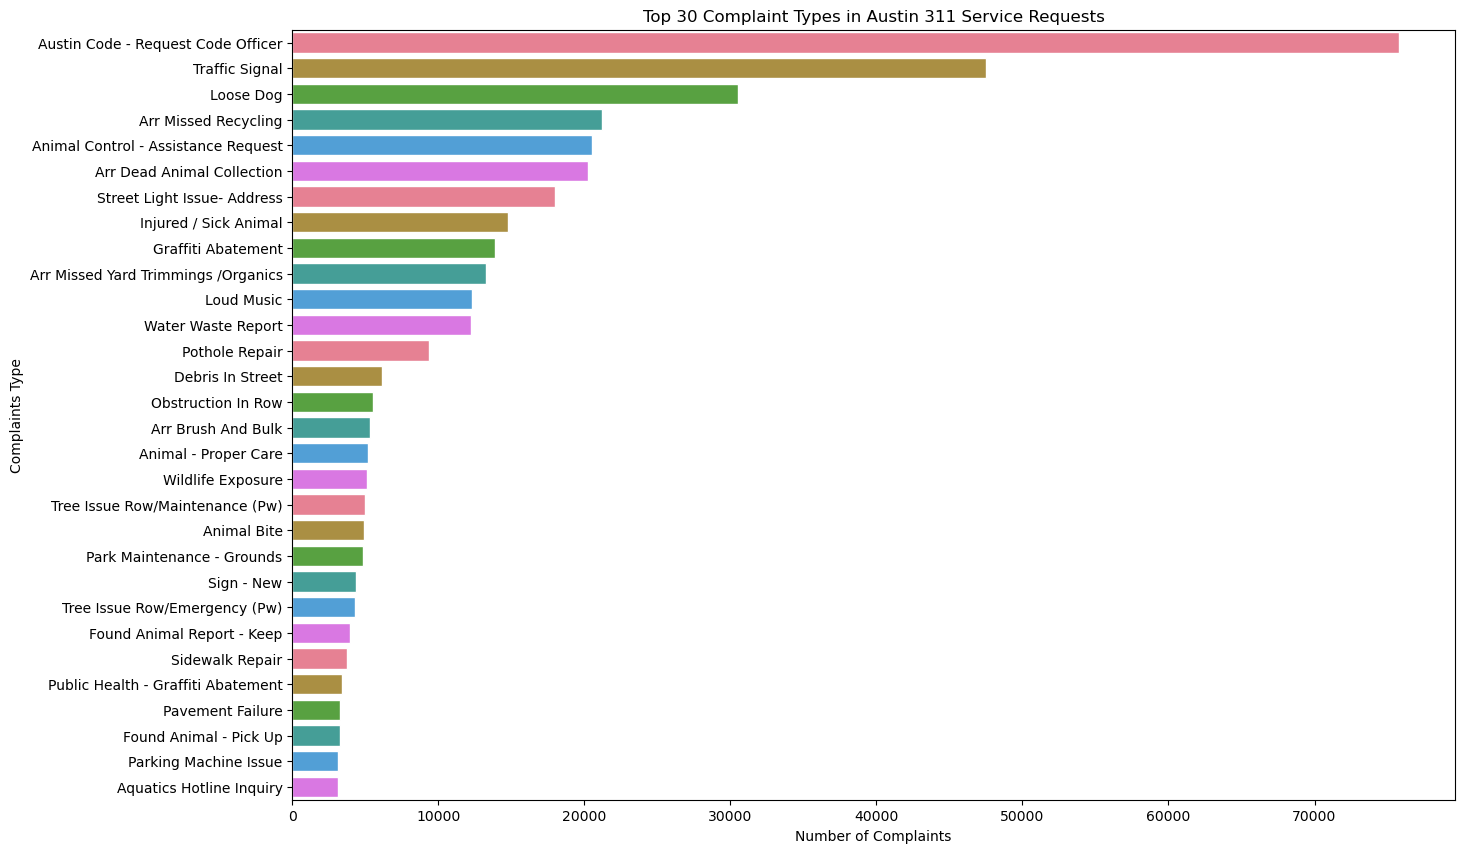

In [22]:
'''Group by complaint_description and count occurrences'''
cd_counts = df1.groupby('complaint_description').size().reset_index(name='Count')

'''Reorder by count and get the top 30'''
top_complaints = cd_counts.sort_values(by='Count', ascending=False).head(30)
top_complaints['complaint_description'] = pd.Categorical(top_complaints['complaint_description'],
                                                         categories=top_complaints.sort_values('Count', ascending=False)['complaint_description'])

plt.figure(figsize=(15, 10))
palette = sns.color_palette('husl')
sns.barplot(x='Count', y='complaint_description', data=top_complaints, palette=palette, edgecolor='white')

plt.xlabel('Number of Complaints')
plt.ylabel('Complaints Type')
plt.title('Top 30 Complaint Types in Austin 311 Service Requests')
plt.show()


The most common complaints are:

- Austin Code - Request Code Officer
- Traffic Signal
- Loose Dog
- ARR Missed Recycling
- Animal Control - Assistance Request
- Arr Dead Animal Collection

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


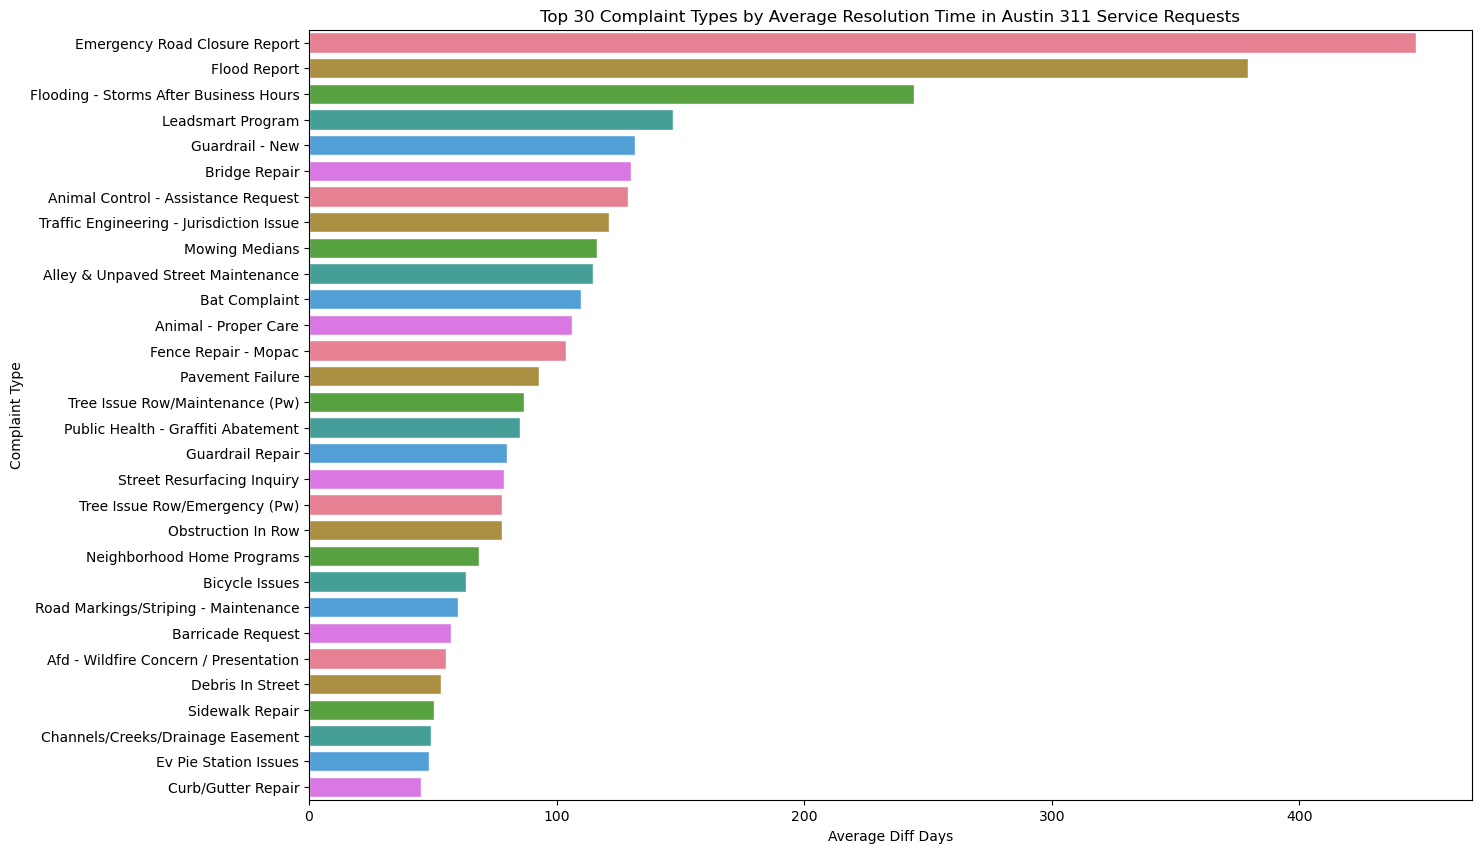

In [23]:
'''Group by complaint types and the average days to solved them'''
avg_diff_days = df1.groupby('complaint_description')['diff_days'].mean().reset_index(name='Avg Days')

'''Reorder by Avg Days and get the top 30'''
top_ddays = avg_diff_days.sort_values(by='Avg Days', ascending=False).head(30)
top_ddays['complaint_description'] = pd.Categorical(
    top_ddays['complaint_description'],
    categories=top_ddays.sort_values('Avg Days', ascending=False)['complaint_description'])

plt.figure(figsize=(15, 10))
palette = sns.color_palette('husl')
sns.barplot(x='Avg Days', y='complaint_description', data=top_ddays, palette=palette, edgecolor='white')

plt.xlabel('Average Diff Days')
plt.ylabel('Complaint Type')
plt.title('Top 30 Complaint Types by Average Resolution Time in Austin 311 Service Requests')
plt.show()

The complaints with the most resolution time are:
- Emergency Road Closure Report
- Flood Report
- Flooding - Storms After Business Hours
- Leadsmart Program
- Guardrail - New

In [24]:
'''Here, we calculate the requests frequency of the difference cities in Austin'''
city_counts = df1.groupby('city').size().reset_index(name='Count')
city_counts_sorted = city_counts.sort_values(by='Count', ascending=False)

'''The total count and the percentage of the total'''
total_count = city_counts_sorted['Count'].sum()
city_counts_sorted['Percentage'] = ((city_counts_sorted['Count'] / total_count) * 100).round(2)
city_counts_sorted.head(5)

,city,Count,Percentage
0,Austin,439571,98.02
32,Pflugerville,2123,0.47
11,Del Valle,1778,0.40
26,Manor,1116,0.25
7,Cedar Park,457,0.10


/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


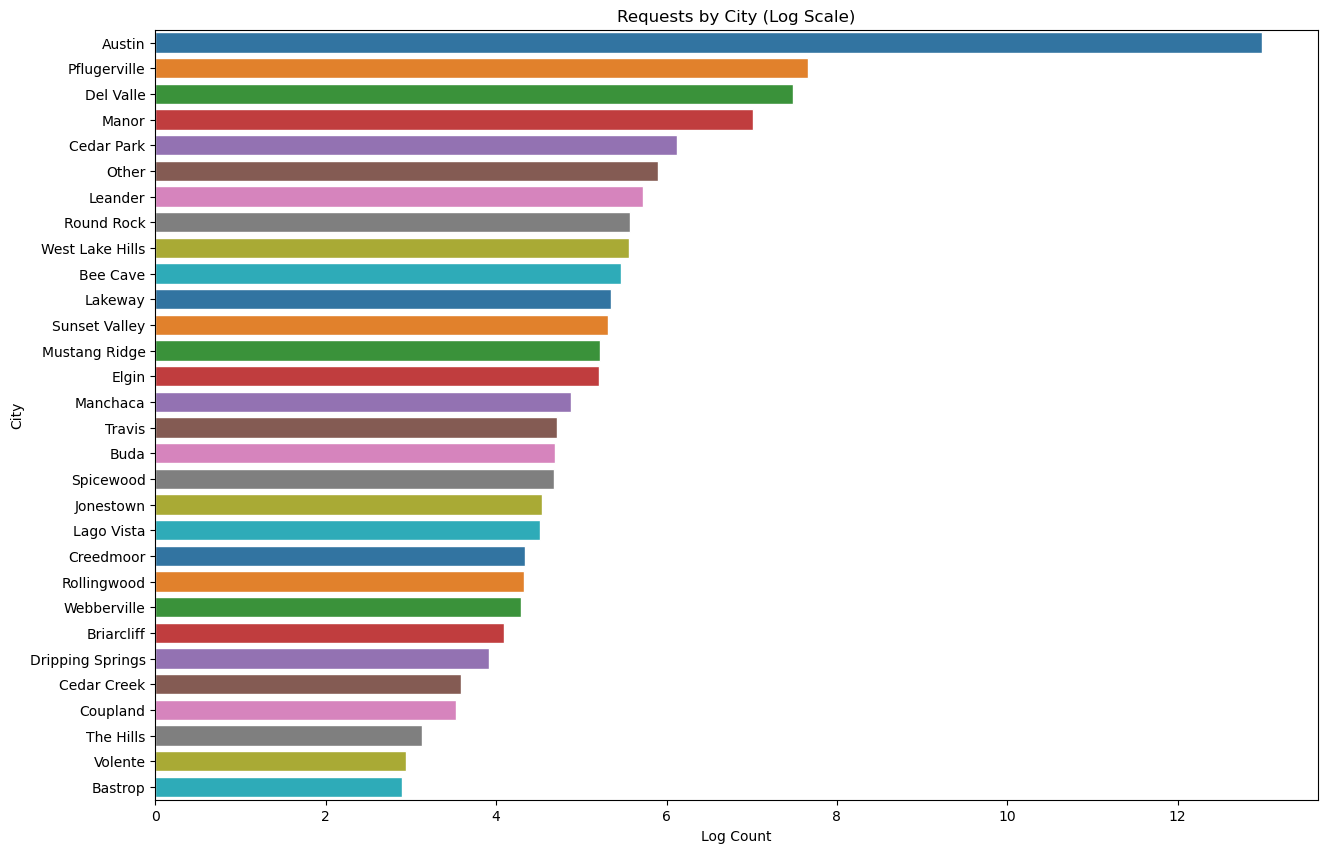

In [25]:
'''
Since Austin downtown, known as Austin, centralize almost the 98% of the requests,
we apply logarithms scales to be able to view properly the graph
'''
'''Group by city and count occurrences'''
city_counts = df1.groupby('city').size().reset_index(name='Count')

'''Apply logarithm to the Count column to handle large disparities in the data'''
city_counts['LogCount'] = np.log1p(city_counts['Count'])  # np.log1p is used for log(1 + x) transformation

'''Reorder by count and get the top 30'''
top_city = city_counts.sort_values(by='Count', ascending=False).head(30)
top_city['city'] = pd.Categorical(top_city['city'],
                                  categories=top_city.sort_values('Count', ascending=False)['city'])

plt.figure(figsize=(15, 10))
palette = sns.color_palette()
sns.barplot(x='LogCount', y='city', data=top_city, palette=palette, edgecolor='white')

plt.xlabel('Log Count')
plt.ylabel('City')
plt.title('Requests by City (Log Scale)')
plt.show()

The cities with most requests are:
- Austin
- Pflugerville
- Del Valle
- Manor
- Cedar Park

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


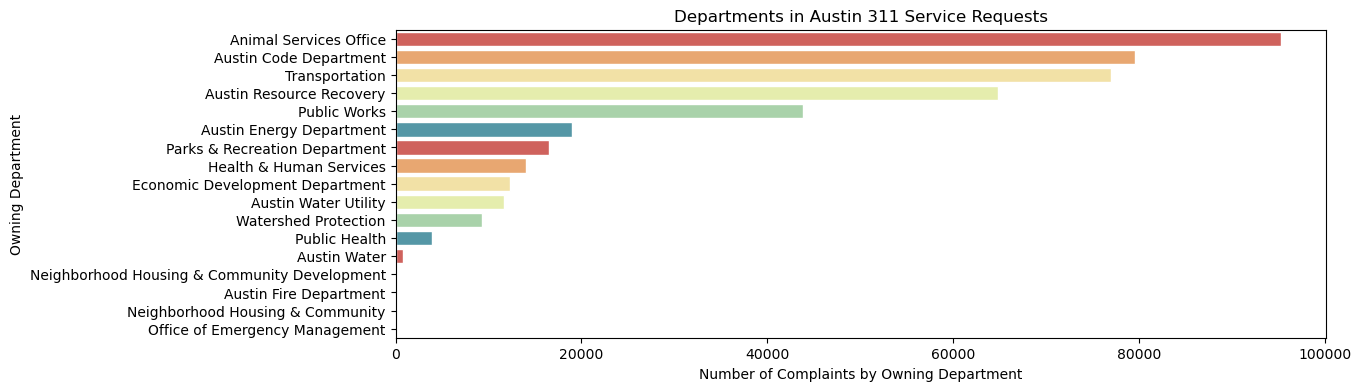

In [26]:
'''Group by Owning Departments and count occurrences'''
od_counts = df1.groupby('owning_department').size().reset_index(name='Count')

'''Reorder by count and get the top 30'''
top_od = od_counts.sort_values(by='Count', ascending=False)
top_od['owning_department'] = pd.Categorical(top_od['owning_department'],
                                      categories=top_od.sort_values('Count', ascending=False)['owning_department'])

plt.figure(figsize=(12, 4))
palette = sns.color_palette('Spectral')
sns.barplot(x='Count', y='owning_department', data=top_od, palette=palette, edgecolor='white')

plt.xlabel('Number of Complaints by Owning Department')
plt.ylabel('Owning Department')
plt.title('Departments in Austin 311 Service Requests')
plt.show()

The Departments most complaints requests with are:
- Animal Services Office
- Austin Code Department
- Transportation
- Austin Resource Recovery
- Public Works

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


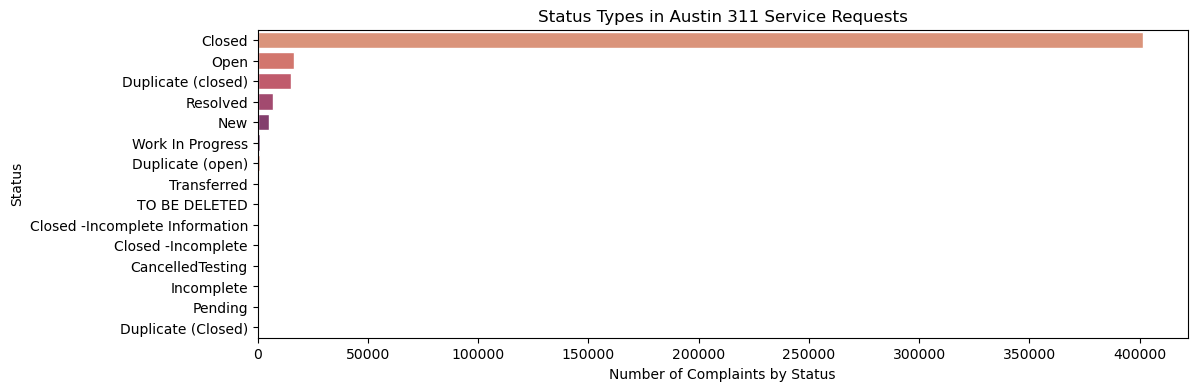

In [27]:
'''Group by Status and count occurrences'''
status_counts = df1.groupby('status').size().reset_index(name='Count')

'''Reorder by count and get the top 30'''
top_status = status_counts.sort_values(by='Count', ascending=False)
top_status['status'] = pd.Categorical(top_status['status'],
                                      categories=top_status.sort_values('Count', ascending=False)['status'])

plt.figure(figsize=(12, 4))
palette = sns.color_palette('flare')
sns.barplot(x='Count', y='status', data=top_status, palette=palette, edgecolor='white')

plt.xlabel('Number of Complaints by Status')
plt.ylabel('Status')
plt.title('Status Types in Austin 311 Service Requests')
plt.show()

In [28]:
df1['status'].unique()

array(['Duplicate (closed)', 'Closed', 'Open', 'Duplicate (open)', 'New',
       'Resolved', 'CancelledTesting', 'Transferred', 'Work In Progress',
       'TO BE DELETED', 'Closed -Incomplete',
       'Closed -Incomplete Information', 'Incomplete', 'Pending',
       'Duplicate (Closed)'], dtype=object)

In [29]:
'''
Let's clean up the DataFrame, keeping non duplicates entries and status that they seem not to be treated,
like those one with missing information
'''
delete2 = df1[df1['status'].isin(['Duplicate (closed)','Duplicate (open)','CancelledTesting','TO BE DELETED',
                                  'Closed -Incomplete','Closed -Incomplete Information','Incomplete','Duplicate (Closed)'])]
print(delete2.shape)
df1 = df1.drop(delete2.index)

(16557, 25)


In [30]:
'''Also, let's group the status by Closed and Resolved as Closed and Open if not'''
def map_status(status):
    if status in ['Closed', 'Resolved']:
        return 'Closed'
    else:
        return 'Open'

df1['status'] = df1['status'].apply(map_status)
df1['status'].unique()

array(['Closed', 'Open'], dtype=object)

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


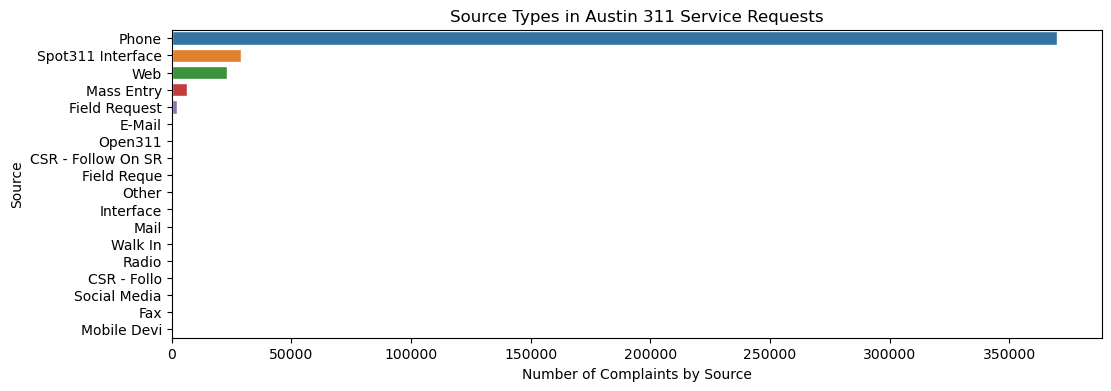

In [31]:
'''Group by Source and count occurrences'''
source_counts = df1.groupby('source').size().reset_index(name='Count')

'''Reorder by count and get the top 30'''
top_source = source_counts.sort_values(by='Count', ascending=False)
top_source['source'] = pd.Categorical(top_source['source'],
                                      categories=top_source.sort_values('Count', ascending=False)['source'])

plt.figure(figsize=(12, 4))
palette = sns.color_palette()
sns.barplot(x='Count', y='source', data=top_source, palette=palette, edgecolor='white')

plt.xlabel('Number of Complaints by Source')
plt.ylabel('Source')
plt.title('Source Types in Austin 311 Service Requests')
plt.show()

In [32]:
'''Also, let's group the source by either Phone or Non-phone'''
def map_source(source):
    if source != 'Phone':
        return 'Non-phone'
    else:
        return 'Phone'

df1['source'] = df1['source'].apply(map_source)
df1['source'].unique()

array(['Phone', 'Non-phone'], dtype=object)

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


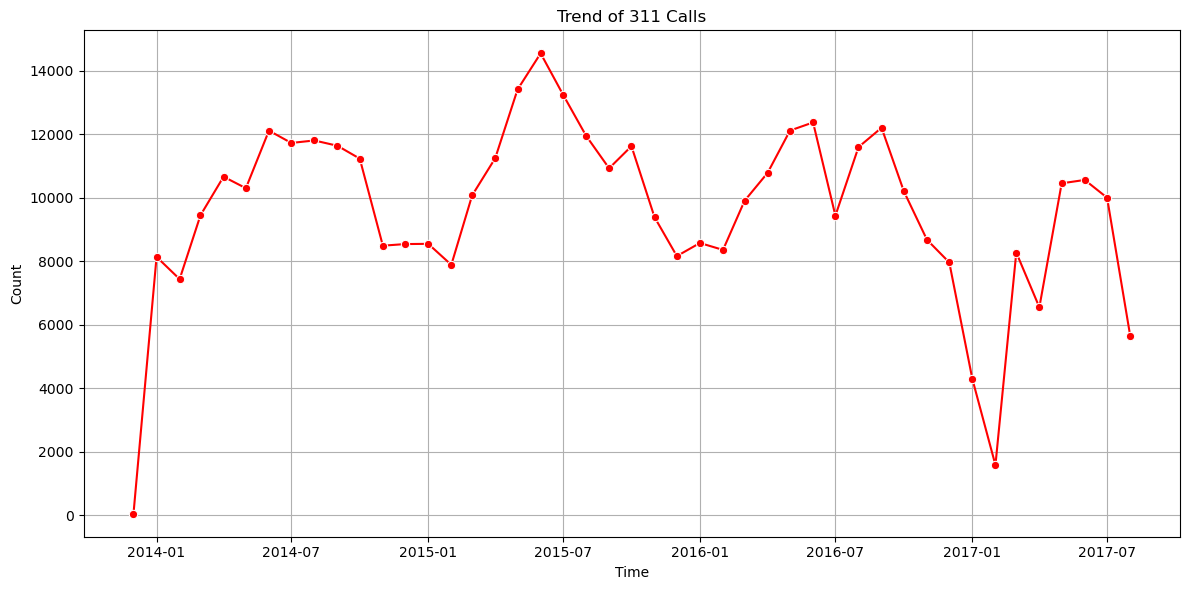

In [33]:

'''Extract year and month from created_date'''
df1['year'] = df1['created_date'].dt.year
df1['month'] = df1['created_date'].dt.month

'''Group by year and month, then count occurrences'''
monthly_counts = df1.groupby(['year', 'month']).size().reset_index(name='Count')

'''Create a 'YearMonth' column for plotting'''
monthly_counts['YearMonth'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

'''Plotting the trend of 311 calls'''
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Count', data=monthly_counts, marker='o', color='red')

'''Adding labels and title'''
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Trend of 311 Calls')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
sample_graph = 10000
df1_graph = df1.sample(n=sample_graph, random_state=15)

fig = px.scatter_mapbox(df1_graph,
                        lat="latitude",
                        lon="longitude",
                        zoom=9, height=600,
                        color='status',
                        size = 'diff_days',
                        color_continuous_scale= ['red', 'orange', 'yellow', 'skyblue', 'blue', 'green', 'black']
                        )
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We can see the closed requests, as it is expected, have the greater days gap for resolution.

We define a function with additional statistics that offers .describe() function in orden to have a better understading of the data

In [39]:
def describe_with_stats(data):
    '''Calculate additional statistics'''
    median = data.median()
    mode = data.mode().iloc[0]  # Access the first element of the mode series
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    '''Combine statistics into a DataFrame'''
    stats = pd.DataFrame({
        'count': data.count(),
        'mode': mode,
        'mean': data.mean(),
        'std': data.std(),
        'min': data.min(),
        '25%': Q1,
        '50% (median)': median,
        '75%': Q3,
        'max': data.max(),
        'IQR': IQR
    })

    stats = stats.T.round({'count': 0})

    return stats

In [33]:
'''Let's validate how the diff_days are distributed'''
days_counts = df1.groupby('diff_days').size().reset_index(name='Count')
days_counts_sorted = days_counts.sort_values(by='Count', ascending=False)

'''The total count and the percentage of the total'''
total_count = days_counts_sorted['Count'].sum()
days_counts_sorted['Percentage'] = ((days_counts_sorted['Count'] / total_count) * 100).round(2)
days_counts_sorted.head(10)

,diff_days,Count,Percentage
0,0.000000,26535,6.14
2,0.000023,317,0.07
1,0.000012,240,0.06
720,0.008333,193,0.04
60,0.000694,188,0.04
540,0.006250,169,0.04
180,0.002083,167,0.04
660,0.007639,149,0.03
120,0.001389,148,0.03
541,0.006262,147,0.03


In [41]:
'''
For simplicity, we can give integer numbers to the diff_days, given 1 (day) for each one less and
equal than one day, 2 for those one less and equal than two days, 3 to those one less and equal than
three days, and so on, to keep the column as a integer and to not creating dummies afterwards.
'''
'''Apply a ceiling function to transform diff_days into integers'''
df1['diff_days_int'] = df1['diff_days'].apply(lambda x: int(x) + 1 if x > int(x) else int(x))
df1['diff_days_int'].value_counts().head(10)


diff_days_int
1    170685
2     53472
3     36693
0     26535
4     23655
5     17528
6     12872
7      8283
8      5254
9      3198
Name: count, dtype: int64

In [42]:
df1_desc = df1[['diff_days','diff_days_int']]
df1_desc = describe_with_stats(df1_desc)
df1_desc

,diff_days,diff_days_int
count,431871.000000,431871.000000
mode,0.000000,1.000000
mean,22.063498,22.622834
std,77.531253,77.516892
min,0.000000,0.000000
25%,0.100671,1.000000
50% (median),1.208333,2.000000
75%,4.777170,5.000000
max,1302.696470,1303.000000
IQR,4.676499,4.000000


The frequencies changed slightly after converting into integer the diff_days

### Outlier Analysis and Distribution

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


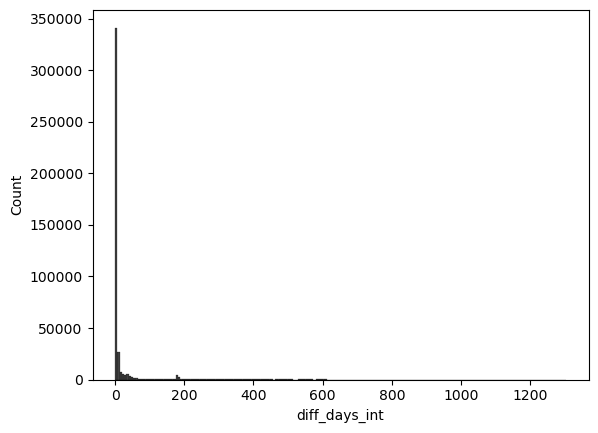

In [43]:
'''Distribution'''
sns.histplot(df1['diff_days_int'], kde=False, color='black', bins=200)
plt.show()

Clearly, our dataset needs to be clean from outliers values

In [44]:

Q1_ddi = df1_desc.iloc[5, 1]
Q3_ddi = df1_desc.iloc[7, 1]
IQR_ddi = df1_desc.iloc[9, 1]

outliers_ddi = (df1['diff_days_int'] > (Q3_ddi + 1.5 * IQR_ddi)) | (df1['diff_days_int'] < (Q1_ddi - 1.5 * IQR_ddi))

In [45]:
'''We delete the outliers from the DataFrame'''
df2 = df1[~outliers_ddi]

In [46]:
df2_desc = df2[['diff_days','diff_days_int']]
df2_desc = describe_with_stats(df2_desc)
df2_desc

,diff_days,diff_days_int
count,363626.000000,363626.000000
mode,0.000000,1.000000
mean,1.722157,2.291877
std,2.197978,2.156877
min,0.000000,0.000000
25%,0.060718,1.000000
50% (median),0.874589,1.000000
75%,2.649586,3.000000
max,11.000000,11.000000
IQR,2.588869,2.000000


/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


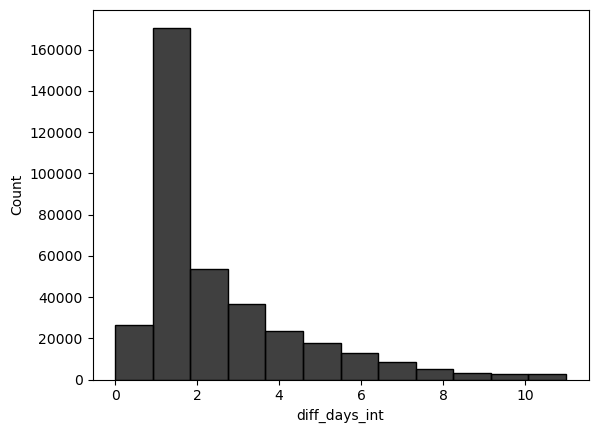

In [47]:
sns.histplot(df2['diff_days_int'], kde=False, color='black', bins=12)
plt.show()

Now, the dataset seems to be more clear without outliers regarding to gap days

Bringing the columns that we believe are the most interesting for modelling

In [48]:
df2.head(3)

,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key,diff_days,year,month,diff_days_int
1,Austin,2016-06-01 10:58:13,Loose Dog,ACLONAG,7.0,TRAVIS,2016-05-22 10:00:49,3104 STONEWAY DR AUSTIN TX 78757,78757.0,2016-06-01 09:58:30,...,1.010083e+07,Closed,2016-06-01 10:58:13,STONEWAY,3104.0,16-00123310,10.039861,2016,5,11
2,Austin,2014-01-06 19:30:00,Loose Animal (Not Dog),ACLOANIM,2.0,TRAVIS,2014-01-06 18:04:00,4100 SMITH SCHOOL RD AUSTIN TX,78744.0,2014-01-06 18:32:00,...,1.004597e+07,Closed,2014-01-06 19:30:00,SMITH SCHOOL,4100.0,14-00003554,0.059722,2014,1,1
3,Austin,2014-11-19 10:46:48,Austin Code - Request Code Officer,CODECOMP,7.0,TRAVIS,2014-11-15 15:43:41,12710 PALFREY DR AUSTIN TX 78727,78727.0,2014-11-19 10:46:48,...,1.012812e+07,Closed,2014-11-19 10:46:48,PALFREY,12710.0,14-00247505,3.793831,2014,11,4


In [49]:
'''Export the clean dataset in order to use it in the models.ipynb for analyzing our best model'''
df3 = df2[['complaint_description','complaint_type','status','diff_days','diff_days_int',
           'city','county','incident_zip','latitude','longitude','location','owning_department','source',
           'created_date','close_date','year','month'
           ]]
df3.head(2)

,complaint_description,complaint_type,status,diff_days,diff_days_int,city,county,incident_zip,latitude,longitude,location,owning_department,source,created_date,close_date,year,month
1,Loose Dog,ACLONAG,Closed,10.039861,11,Austin,TRAVIS,78757.0,30.350881,-97.747492,(30.35088127 -97.74749187),Animal Services Office,Phone,2016-05-22 10:00:49,2016-06-01 10:58:13,2016,5
2,Loose Animal (Not Dog),ACLOANIM,Closed,0.059722,1,Austin,TRAVIS,78744.0,30.199263,-97.711366,(30.19926272 -97.71136636),Animal Services Office,Phone,2014-01-06 18:04:00,2014-01-06 19:30:00,2014,1


Now, we split the dataset for modelling and a sample for testing the best model, so let's do it as 85% - 15%, respectively!

In [51]:

modelling, testing = train_test_split(df3, test_size=0.15, random_state=12)

'''Save the splits into separate CSV files'''
modelling.to_csv('models/models.csv', sep=',', index=False, encoding='utf-8')
testing.to_csv('models/models_testing.csv', sep=',', index=False, encoding='utf-8')

print('Datasets have been split and saved successfully!')


Datasets have been split and saved successfully!


## Machine Learning Models


In [48]:
df4 = df3[['status','diff_days_int', 'complaint_type', 'source', 'owning_department']]

In [49]:
df4['status'] = df4['status'].str.strip()
df4['source'] = df4['source'].str.strip()

'''Convert 'status' and 'source' to binary values'''
status_mapping = {'Closed': 1, 'Open': 0}
source_mapping = {'Phone': 1, 'Non-phone': 0}

df4['status'] = df4['status'].map(status_mapping)
df4['source'] = df4['source'].map(source_mapping)

/var/folders/_m/x_6kdcg111940vvx5zz0_c7r0000gn/T/ipykernel_4803/1969174308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['status'] = df4['status'].str.strip()
/var/folders/_m/x_6kdcg111940vvx5zz0_c7r0000gn/T/ipykernel_4803/1969174308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['source'] = df4['source'].str.strip()
/var/folders/_m/x_6kdcg111940vvx5zz0_c7r0000gn/T/ipykernel_4803/1969174308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [52]:
'''Prepare X and y'''
y = df4['status']
X = df4[['diff_days_int', 'source']]

In [53]:

print("Prepared X:")
print(X.head())

print("\nPrepared y:")
print(y.head())

Prepared X:
   diff_days_int  source
1             11       1
2              1       1
3              4       0
6              1       1
7              4       1

Prepared y:
1    1
2    1
3    1
6    1
7    1
Name: status, dtype: int64


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

'''Print the sizes of the training and test sets'''
print("Training set size:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting set size:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set size:
X_train: (290900, 2)
y_train: (290900,)

Testing set size:
X_test: (72726, 2)
y_test: (72726,)


In [ ]:
'''Standardize features (important for some algorithms like SVM)'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
'''Logistic Regression'''
log_reg = LogisticRegression(random_state=12)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

'''Decision Tree'''
tree_clf = DecisionTreeClassifier(random_state=12)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

'''Random Forest'''
rf_clf = RandomForestClassifier(n_estimators=100, random_state=12)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

'''Support Vector Machine'''
svm_clf = SVC(random_state=12)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

In [56]:

'''Evaluate the models'''
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}\n")

print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}\n")

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")

print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4560
           1       0.94      1.00      0.97     68166

    accuracy                           0.94     72726
   macro avg       0.47      0.50      0.48     72726
weighted avg       0.88      0.94      0.91     72726

Accuracy: 0.9372989027307977

Decision Tree:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48      4560
           1       0.96      0.98      0.97     68166

    accuracy                           0.94     72726
   macro avg       0.75      0.70      0.72     72726
weighted avg       0.94      0.94      0.94     72726

Accuracy: 0.9416989797321453

Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48      4560
           1       0.96      0.98      0.97     68166

    accuracy                           0.94     72726
   macro avg     

/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jorgeccorrov/anaconda3/envs/m-bts/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.55      0.42      0.48      4560
           1       0.96      0.98      0.97     68166

    accuracy                           0.94     72726
   macro avg       0.75      0.70      0.72     72726
weighted avg       0.94      0.94      0.94     72726

Accuracy: 0.9416989797321453



**Logistic Regression:**
- Accuracy: 93.73%
- Precision, Recall, F1-Score (Class 0): All metrics are 0.00, indicating that the model failed to predict any instances of the minority class (Class 0).
- Precision, Recall, F1-Score (Class 1): High values, showing the model is very good at predicting the majority class (Class 1).

**Decision Tree:**
- Accuracy: 94.17%
- Precision (Class 0): 55%, indicating moderate ability to identify the minority class.
- Recall (Class 0): 42%, showing the model misses more than half of the minority class instances.
- Precision, Recall, F1-Score (Class 1): High values, similar to Logistic Regression.

**Random Forest:**
- Accuracy: 94.17% (same as Decision Tree)
- Class 0 and Class 1 Metrics: Similar to Decision Tree, with moderate precision and recall for Class 0 and high values for Class 1.

**Support Vector Machine:**
- Accuracy: 94.17% (same as Decision Tree and Random Forest)
- Class 0 Metrics: Similar to Logistic Regression, with precision, recall, and F1-score all being low or zero.
- Class 1 Metrics: High precision, recall, and F1-score.

**General Analysis:**
- Imbalance Issue: All models show high accuracy primarily due to the imbalance in the dataset, where the majority class dominates.
- Class 0 Performance: Logistic Regression and SVM fail to predict Class 0. Decision Tree and Random Forest perform slightly better but still show poor recall.
- Class 1 Performance: All models perform exceptionally well on the majority class (Class 1).

**Conclusion:**
- Imbalance Handling: The results highlight the need for techniques like SMOTE to handle class imbalance and improve the model's ability to predict minority class instances.
- Model Performance: Despite high accuracy, the performance on the minority class (Class 0) is inadequate, indicating the models' bias towards the majority class.

## Implementation of Resampling Techniques
Let's start with implementing oversampling using SMOTE and then retrain the models:

In [78]:

'''Split the data into training and testing sets'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

columns = X_train.columns

'''Apply SMOTE to the training set'''
smote = SMOTE(random_state=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled = pd.DataFrame(data=X_train_resampled, columns=columns)
y_train_resampled = pd.DataFrame(data=y_train_resampled, columns=['status'])


In [81]:
'''Checking the new distribution of our data'''
print("length of oversampled data is ",len(X_train_resampled))
print("Number of Open request in oversampled data",len(y_train_resampled[y_train_resampled['status']==0]))
print("Number of Closed request",len(y_train_resampled[y_train_resampled['status']==1]))
print("Proportion of Open request data in oversampled data is ",len(y_train_resampled[y_train_resampled['status']==0])/len(X_train_resampled))
print("Proportion of Closed request data in oversampled data is ",len(y_train_resampled[y_train_resampled['status']==1])/len(X_train_resampled))

length of oversampled data is  545856
Number of Open request in oversampled data 272928
Number of Closed request 272928
Proportion of Open request data in oversampled data is  0.5
Proportion of Closed request data in oversampled data is  0.5


In [80]:
'''Standardize features (important for some algorithms like SVM)'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:

'''Logistic Regression'''
log_reg = LogisticRegression(random_state=12)
log_reg.fit(X_train_scaled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test_scaled)

'''Decision Tree'''
tree_clf = DecisionTreeClassifier(random_state=12)
tree_clf.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree_clf.predict(X_test)

'''Random Forest'''
rf_clf = RandomForestClassifier(n_estimators=100, random_state=12)
rf_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_clf.predict(X_test)

'''Support Vector Machine'''
svm_clf = SVC(random_state=12)
svm_clf.fit(X_train_scaled, y_train_resampled)
y_pred_svm = svm_clf.predict(X_test_scaled)

In [57]:

'''Evaluate the models'''
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}\n")

print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}\n")

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")

print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.09      0.81      0.17      4560
           1       0.97      0.47      0.64     68166

    accuracy                           0.49     72726
   macro avg       0.53      0.64      0.40     72726
weighted avg       0.92      0.49      0.61     72726

Accuracy: 0.49459615543272006

Decision Tree:
              precision    recall  f1-score   support

           0       0.42      0.48      0.44      4560
           1       0.96      0.96      0.96     68166

    accuracy                           0.93     72726
   macro avg       0.69      0.72      0.70     72726
weighted avg       0.93      0.93      0.93     72726

Accuracy: 0.9250886890520584

Random Forest:
              precision    recall  f1-score   support

           0       0.42      0.48      0.44      4560
           1       0.96      0.96      0.96     68166

    accuracy                           0.93     72726
   macro avg    

Since the group of models with the SMOTE approach lasted around 97'32'' in executing, let's save the models as a .pickle

In [82]:
import pickle

'''Save the scaler for future use'''
with open('models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

'''Save the Logistic Regression model'''
with open('models/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

'''Save the Decision Tree model'''
with open('models/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(tree_clf, file)

'''Save the Random Forest model'''
with open('models/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

'''Save the Support Vector Machine model'''
with open('models/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_clf, file)
